# 1. Import Packages

Need to install these packages in terminal in your environment

In [1]:
import os,sys
curr_dir = os.getcwd()
import pickle
import csv
print(curr_dir)

print(sys.version_info[0])

/home/CAMPUS/nabieir/NLP_LDA
3


## import time
from pathlib import Path
import nltk; nltk.download('stopwords')

In [2]:
import time
import re
import numpy as np
import pandas as pd
from pprint import pprint

# spacy for lemmatization
import spacy

Genism
Here we add Gensim libraries 

In [3]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import gensim 
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import coherencemodel

plotting tools 

In [4]:
# import pyLDAvis
# import pyLDAvis.gensim # don't skip this 
# import matplotlib.pyplot as plt 

Enable logging for gensim - optional

In [5]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# What does LDA do?
LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, all it does it to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

When I say topic, what is it actually and how it is represented?

A topic is nothing but a collection of dominant keywords that are typical representatives. Just by looking at the keywords, you can identify what the topic is all about.

The following are key factors to obtaining good segregation topics:

1. The quality of processed text data.
2. The variety of topics the text talks about.
3. The choice of topic modeling algorithm.
4. The number of topics fed to the algorithm.
5. The algorithms tuning parameters.

# 2. Prepare Stopwords
We have already downloaded the stopwords. Let’s import them and make it available in stop_words.

In [6]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/CAMPUS/nabieir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# from pathlib import Path
import os.path 
filename = curr_dir + "/data/clinical_reviews_only_english.txt"
if not os.path.isfile(filename):
    print("Oops, file doesn't exist!")
else:
    print("Yay, the file exists!")

with open(filename, 'r', encoding="utf-8") as f:
    data = f.read().splitlines()

    
    

Yay, the file exists!


In [8]:
def savetofile (fpath,data):
    with open(fpath,"wt") as f:
        for sent in data:
            f.write(sent + '\n')

# Deleting non-English sentences 
We can use polyglot or langdetect package. polyglot is faster and can be used for name-entity detection as well. 

In [9]:
# # detecting non-english sentences
# from polyglot.detect import Detector
# non_english = {}

# for i,sent in enumerate(data):
#     detector = Detector(sent,quiet=True)
#     if detector.language.code != 'en':
#         non_english[i] = sent
# print(len(non_english),len(data))

##### This is another package langdetect but it is slower !!!

# from langdetect import detect

# non_english = []

# for i,sent in enumerate(data):
#     detector = detect(sent)
#     if detector != 'en':
#         non_english.append(sent)
#         print(i,sent)
        
# print(len(non_english))

In [10]:
## save only english text as a new source text data 

# for index in sorted(non_english, reverse=True):     #Delete detected non_english sentences
#     del data[index]
    
# with open(curr_dir + "/data/clinical_reviews_only_english.txt","wt") as f:
#     for sent in data:
#         f.write(sent + '\n')
        

# Find abbriviation

In [11]:
# A = "salam che LSB khoobi ?"
# test = re.findall('([A-Z]+)', A)
# print(test)
# import re
# for i,sent in enumerate(data):
#     abbr = re.findall(r'\b[A-Z][A-Z]+\b',sent)
#     if len(abbr) > 0:
#         print (i,abbr)

In [12]:
# print("lenght of data was :" + str(len(data)))
# # Deleting very small sentences (Document)
# #data1 = [1, 3, 6, 35, 3 ,47,9,15]
# # print(data1)
# i = 0
# for n in data[:]:
#     if len(n) < 200:
#         print(n)
#         data.remove(n)
        
# savetofile(curr_dir + "/data/clinical_reviews_only_english_200char.txt",data)       

# 3. Import Patient review data from Yelp dataset

In [13]:
# def CountChar(List):      # funtion to count all the characters in a list
#     sum = 0
#     for line in List:
#         sum += len(line)
#     return sum
# # OriginalLenght = sum(len(line) for line in List) # this is more pythonic

# 8. Tokenize words and Clean-up text
Let’s tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.

Gensim’s simple_preprocess() is great for this. Additionally I have set deacc=True to remove the punctuations.

In [14]:
def sent_to_words(sentences):
    for i,sentence in enumerate(sentences):
#         if i % 100000 == 0:    # this is just for debugging when the database is very big
#             print (i/100000)
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# TODO count the number of sentences         
data_words = list(sent_to_words(data))
#data_words = list(filter(None, data_words)) #_ remove empty cells in the list
#data = list(filter(None, data)) #_ remove empty cells in the list
#print(len(data))
# TODO count the number of sentences maybe compare them here

In [174]:
print(gensim.utils.simple_preprocess('InthenameofGodR the, 1lord name of God!', deacc=True))

['inthenameofgodr', 'the', 'lord', 'name', 'of', 'god']


In [15]:
# # print(sum(len(sen) for sen in data))
# print(CountChar(data)) 
# # print(sum(len(words) for words in data_words))
# print(CountChar(data_words))

# 9. Creating Bigram and Trigram Models
Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.

Some examples in our patient review data are: ‘weight_loss’, ‘weigth_training’, 'most_likely' etc.

Gensim’s Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to Phrases are min_count and threshold. The higher the values of these param, the harder it is for words to be combined to bigrams.

In [16]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=80)# higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
# Print(trigram_mod[bigram_mod[data_words[0]]])

/home/CAMPUS/nabieir/anaconda3/envs/python3.6/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [17]:
#len(bigram_mod)

In [18]:
#print(bigram_mod[data_words[59]])

##### 10. Remove Stopwords, Make Bigrams and Lemmatize
The bigrams model is ready. Let’s define the functions to remove the stopwords, make bigrams and lemmatization and call them sequentially.

In [19]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

Let’s call the functions in order.

In [20]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


# 11. Create the Dictionary and Corpus needed for Topic Modeling
The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

In [21]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

#_ Joiining words together to build sentences this will be used later 
data = [' '.join(lemma) for lemma in data_lemmatized] 

# View
# print(corpus[2])

In [22]:
# import pandas as pd         #Find the term-frequency in dictionary        
# # vocab = list(id2word.values()) #list of terms in the dictionary
# vocab_tf = [dict(i) for i in corpus]
# vocab_tf = list(pd.DataFrame(vocab_tf).sum(axis=0))

In [263]:
# # rare_tokens = [index for index in range(len(vocab_tf)) if vocab_tf[index]<4] #index of the word that appear less than 3 times in the corpus
# print(type(vocab_tf))
# print(id2word[max(range(len(vocab_tf)), key=vocab_tf.__getitem__)])

<class 'list'>
go


In [ ]:
# print([id2word[index] for index in one_tokens])

Or, you can see a human-readable form of the corpus itself.

In [ ]:
# Human readable format of corpus (term-frequency)
# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]]

In [166]:
# print(len(data_lemmatized))
# print(len(corpus))
# AVG = sum (len(Sen) for Sen in data_lemmatized)/len(data_lemmatized)
# print(AVG)

15580
15580
54.70783055198973


# Building LDA Mallet Model
Gensim provides a wrapper to implement Mallet’s LDA from within Gensim itself. You only need to download the zipfile, unzip it and provide the path to mallet in the unzipped directory to gensim.models.wrappers.LdaMallet. See how I have done this below.

In [ ]:
# # Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# mallet_path = '/home/CAMPUS/nabieir/anaconda3/mallet-2.0.8/bin/mallet' # update this path
# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

# Find the optimal number of topics for LDA?

In [23]:
mallet_path = '/home/CAMPUS/nabieir/anaconda3/mallet-2.0.8/bin/mallet' # update this path

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    
    NOTE, The Coherence calcualation has been commented out, and calculated separately later
    """
    #coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        start_time = time.time()
        print("Training LDA with %d topics starts ..." % num_topics )
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        #coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        #coherence_ldamallet = coherence_model.get_coherence()
        #coherence_values.append(coherence_ldamallet)
        print("LDA training time = %s min" % ((time.time() - start_time)/60))
        #print('Coherence Score: ', coherence_ldamallet)
    return model_list

In [24]:
model_list = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=10, limit=220, step=10)

Training LDA with 10 topics starts ...
LDA training time = 0.7892612854639689 min
Training LDA with 20 topics starts ...
LDA training time = 0.7959242184956868 min
Training LDA with 30 topics starts ...
LDA training time = 0.7975939472516378 min
Training LDA with 40 topics starts ...
LDA training time = 0.8321049451828003 min
Training LDA with 50 topics starts ...
LDA training time = 0.8111048777898152 min
Training LDA with 60 topics starts ...
LDA training time = 0.818677278359731 min
Training LDA with 70 topics starts ...
LDA training time = 0.8444813172022502 min
Training LDA with 80 topics starts ...
LDA training time = 1.0202747583389282 min
Training LDA with 90 topics starts ...
LDA training time = 1.0588663578033448 min
Training LDA with 100 topics starts ...
LDA training time = 1.0926095525423685 min
Training LDA with 110 topics starts ...
LDA training time = 1.184247612953186 min
Training LDA with 120 topics starts ...
LDA training time = 1.1479732751846314 min
Training LDA wi

In [29]:
# To save our models 
import os
directory = curr_dir + '/MalletModels/'
if not os.path.exists(directory):
    os.makedirs(directory)
    
for i,model in enumerate(model_list):
    filename =  directory + str(i) + ".mallet" 
    model.save(filename)

In [ ]:
# To load our models 
# model_list = []
# for i in range(20):
#     filename =  current + "/MalletModels/" + str(i) + ".mallet"
#     model_list.append(gensim.models.wrappers.LdaMallet.load(filename,mmap='r'))

In [163]:
# len(model_list)
len(id2word)

20928

In [ ]:
coherence_values = []
for Mmodel in model_list:
    coherence_model = gensim.models.CoherenceModel(model=Mmodel, texts=data_lemmatized, dictionary=id2word, coherence='c_v', topn = 10)
    coherence_ldamallet = coherence_model.get_coherence()
    coherence_values.append(coherence_ldamallet)
    print('Coherence Score: ', coherence_ldamallet)

In [30]:
# This is to save the Coherence_values to a text file
print(len(coherence_values))
with open(curr_dir + "/MalletModels/CV_Coherence_topn10.txt","wt") as f:
    for C in coherence_values:
        f.write(str(C) +"\n")

21


In [ ]:
# # Load Coherence_values form a text file to a list
# coherence_values = []
# with open("/home/CAMPUS/nabieir/HDD/LDA/Gensim-LDA/MalletModels/Coherences.txt", "r") as f:
#     for line in f:coherence_values.append(float(line.strip()))

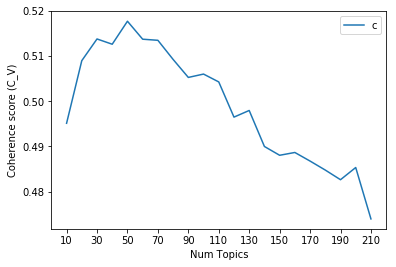

In [43]:
# Show graph
import matplotlib.pyplot as plt
limit=220; start=10; step=10;
x = range(start, limit, step)
num_topic = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xticks(np.arange(min(x), max(x)+1, 20))
# ax.grid(True)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score (C_V)")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(num_topic, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [160]:
#type(optimal_model)
#optimal_model.show_topic(20,topn=10)
print(topic_list[0])

[('life', 0.08423256563053631), ('health', 0.04469318730874537), ('year', 0.037928813013367695), ('change', 0.03511032372362699), ('condition', 0.026896440650668384), ('treat', 0.020293122886133032), ('healthy', 0.02021259462071187), ('live', 0.017957803188919312), ('save', 0.017555161861813495), ('trust', 0.013689805121597681)]


In [164]:
# Select the model with the highest coherence and print the topics
optimal_model = model_list[max(range(len(coherence_values)), key=coherence_values.__getitem__)]
# model_topics = optimal_model.show_topics(formatted=False)
# roo = dict(sorted(optimal_model.show_topics(num_topics=50, num_words=10,formatted=False),key=lambda x: (x[0]))))
topic_list = []
for x in sorted(optimal_model.show_topics(num_topics=50,num_words=10,formatted=False),key=lambda x: (x[0])):
     topic_list.append(x[1])

optimal_model.show_topic(0,topn=len(id2word))

[('life', 0.08423256563053631),
 ('health', 0.04469318730874537),
 ('year', 0.037928813013367695),
 ('change', 0.03511032372362699),
 ('condition', 0.026896440650668384),
 ('treat', 0.020293122886133032),
 ('healthy', 0.02021259462071187),
 ('live', 0.017957803188919312),
 ('save', 0.017555161861813495),
 ('trust', 0.013689805121597681),
 ('meet', 0.011273957158962795),
 ('heart', 0.01111290062812047),
 ('continue', 0.010871315831856982),
 ('worth', 0.01079078756643582),
 ('person', 0.010710259301014656),
 ('quality', 0.010388146239330005),
 ('good', 0.009421807054276051),
 ('age', 0.009260750523433725),
 ('man', 0.009180222258012563),
 ('improve', 0.0090996939925914),
 ('support', 0.008858109196327912),
 ('grateful', 0.008697052665485585),
 ('approach', 0.00853599613464326),
 ('diagnose', 0.008455467869222097),
 ('big', 0.008374939603800934),
 ('knowledge', 0.007730713480431631),
 ('true', 0.007489128684168143),
 ('entire', 0.007247543887904655),
 ('disease', 0.007086487357062329),
 (

# Finding the dominant topic in each sentence
One of the practical application of topic modeling is to determine what topic a given document is about.
To find that, we find the topic number that has the highest percentage contribution in that document.

The format_topics_sentences() function below nicely aggregates this information in a presentable table.


In [ ]:
# #optimal_model[corpus[1]]
# print(len(data))
# print(len(corpus))
# print(len(df_dominant_topic))
# df_dominant_topic.tail(20)

In [ ]:
# df_dominant_topic.to_pickle("df_dominant_topic.pkl")
# df_topic_sents_keywords.to_pickle("df_topic_sents_keywords.pkl")

In [ ]:
A  = df_dominant_topic[['Dominant_Topic','Keywords']]  # prevelant to save topics first 10 words to CSV file
B = A.drop_duplicates(subset='Dominant_Topic', keep="first") 
B.sort_values('Dominant_Topic').to_csv("Keywords11.csv",doublequote = False) 

In [98]:
doc_topic_matrix = np.zeros((50,len(corpus)))
for i, row in enumerate(optimal_model[corpus]):
    row = sorted(row, key=lambda x: (x[0]))
    for topic,prop in row:
        doc_topic_matrix[topic][i] = prop
        
top10_doc = []
for x in doc_topic_matrix:
    top10_doc.append([x for x in (-x).argsort()[:10]])


In [162]:
print(topic_list[0])
print('\n'.join([data[i] for i in top10_doc[0][:4]]))

[('life', 0.08423256563053631), ('health', 0.04469318730874537), ('year', 0.037928813013367695), ('change', 0.03511032372362699), ('condition', 0.026896440650668384), ('treat', 0.020293122886133032), ('healthy', 0.02021259462071187), ('live', 0.017957803188919312), ('save', 0.017555161861813495), ('trust', 0.013689805121597681)]
first arrive shea medical sick health get bad day pass diagnose year ago lyme_disease try conventional treatment nothing depress lose hope ever live normal life day google lyme literate doctor shea medical first display click link life forever change click immediately send online inquiry figure would hear someone next day minute receive phone call speak patient coordinator compassionate knowledgeable answer question send detailed information read listen remember bit surprised compassion never receive medical professional year fight disease soon listen presentation send know shea medical place need initial_consultation far exceed expectation doctor take time lis

In [92]:
def format_topics_sentences(ldamodel, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.0726,"call, receive, send, return, request, referral...",never know awesome service staff shit hit fan ...
1,1,18.0,0.0615,"wait, hour, room, minute, long, time, sit, hal...",adult year become try true doctor snob wait ex...
2,2,31.0,0.0660,"surgery, ray, foot, procedure, week, hand, bre...",johnsen treat sports_relat knee injury profess...
3,3,12.0,0.0611,"doctor, find, office, patient, nurse, talk, fi...",absolute_worst doctor office vegas wait hour e...
4,4,31.0,0.0481,"surgery, ray, foot, procedure, week, hand, bre...",go liu seem great doctor office staff rude try...
5,5,28.0,0.0462,"feel, make, question, answer, comfortable, rus...",owner joe thorough care client make feel comfo...
6,6,45.0,0.0547,"great, staff, friendly, experience, job, highl...",jone great personable really spend time get kn...
7,7,39.0,0.1035,"chiropractor, neck, chiropractic, back, adjust...",second baby attempt hit gym get back shape bod...
8,8,13.0,0.0791,"good, recommend, find, friend, feel, wife, hap...",lee recommend friend bother shoulder pain weig...
9,9,41.0,0.0869,"massage, therapist, feel, session, body, press...",impressed search good massage arrive phoenix a...


In [ ]:
df_dominant_topic_Roo
for i in [5,7,9]:
    if i != 5:
        df_topic_Roo = df_topic_Roo.append(format_topics_sentences(ldamodel=model_list[i], corpus=corpus, texts=data))

# Format
    df_dominant_topic_Roo[i] = df_topic_sents_keywords.reset_index()
    df_dominant_topic_Roo[i].columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
    

In [ ]:
print(df_dominant_topic.iloc[7][4])
print(sorted(optimal_model[corpus][4], key=lambda x: x[1], reverse= True))

In [ ]:
print(df_dominant_topic.iloc[10,3])
print(df_dominant_topic.iloc[5,4])

In [ ]:
optimal_model.show_topic(1)

# Find the most representative document for each topic
Sometimes just the topic keywords may not be enough to make sense of what a topic is about. So, to help with understanding the topic, you can find the documents a given topic has contributed to the most and infer the topic by reading that document. Whew!!

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

In [ ]:
print(sent_topics_sorteddf_mallet.iloc[20][2])
print(sent_topics_sorteddf_mallet.iloc[20][3])

# Topic distribution across documents
Finally, we want to understand the volume and distribution of topics in order to judge how widely it was discussed. The below table exposes that information.

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

In [ ]:
a = [] 
a = a.append('333')
print(a)